In [1]:
import qutip
import matplotlib.pyplot as plt 
import numpy as np
import scipy.optimize as opt 
import scipy.linalg as linalg
import pickle
import time as time
import math, cmath
import sys
import auxiliary_library as me

from IPython.display import display, Math, Latex

In [26]:
rho_at_t0 = resultsA["State ev"][0]
#rho_at_t0.dims = [[2, 2, 2, 2, 2], [2, 2, 2, 2, 2]]

rho_at_t0 = qutip.Qobj(rho_at_t0.reshape((16,16)), dims = [[2, 2, 2, 2, 2], [2, 2, 2, 2, 2]])
rho_at_t0

Quantum object: dims = [[2, 2, 2, 2, 2], [2, 2, 2, 2, 2]], shape = (16, 16), type = oper, isherm = False
Qobj data =
[[ 5.30762506e-03+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  3.07899803e-05-8.45787008e-06j
   0.00000000e+00+0.00000000e+00j  1.09849748e-05-2.49475046e-05j
   2.64238350e-05+2.48599229e-06j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  1.49249156e-05-1.23021775e-05j
   6.10167072e-06-1.41699540e-05j  0.00000000e+00+0.00000000e+00j
   1.95885982e-05+4.32771254e-06j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  1.67060993e-07-1.34644545e-07j]
 [ 0.00000000e+00+0.00000000e+00j  1.12633467e-05-3.44237092e-07j
   8.85375940e-06-5.64040899e-06j  0.00000000e+00+0.00000000e+00j
   7.64696588e-07-1.25757188e-05j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  3.68818288e-08-1.40743075e-07j
   1.66326742e-05+5.75604128e-06j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.0000

two-body operator chosen
Closed evolution chosen
sampling: 30
--- 372.01574778556824 seconds ---
two-body operator chosen
Closed evolution chosen
sampling: 30
--- 574.1944627761841 seconds ---


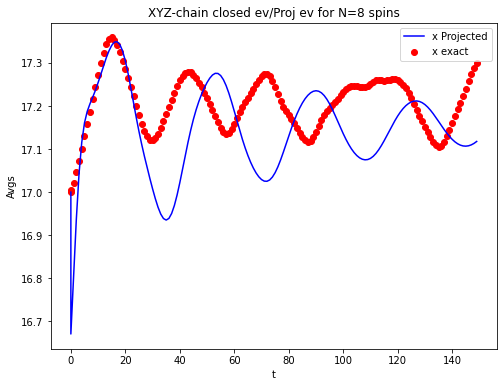

In [8]:
start_time = time.time()
chain_type = "XYZ" 
H_paras = [.15, .25, .1, 1.]
unitary_ev = True; gamma = None
size = 8; gaussian = False; gr = 2; xng = .7

resultsA, title = me.spin_chain_ev(size = size, chain_type = chain_type, Hamiltonian_paras = H_paras, 
                                omega_1=3., omega_2=3., temp=1, tmax = 150, deltat = 1,                                  two_body_basis = True, unitary_ev = unitary_ev, gamma = gamma,
                                gaussian = gaussian, gr = gr, xng = xng, do_project = True)

print("--- %s seconds ---" % (time.time() - start_time))

resultsB, title = me.spin_chain_ev(size = size, chain_type = chain_type, Hamiltonian_paras = H_paras, 
                                omega_1=3., omega_2=3., temp=1, tmax = 150, deltat = 1,  
                                two_body_basis = True, unitary_ev = unitary_ev, gamma = gamma,
                                gaussian = gaussian, gr = gr, xng = xng, do_project = False)

print("--- %s seconds ---" % (time.time() - start_time))

plt.figure(figsize=(8, 6))
plt.plot(resultsA["ts"], resultsA["averages"][:,0], label="x Projected", color = "blue")
plt.scatter(resultsB["ts"], resultsB["averages"][:,0], label="x exact", color = "red")

plt.xlabel("t")
plt.ylabel("Avgs")

plt.title(title)
plt.legend()

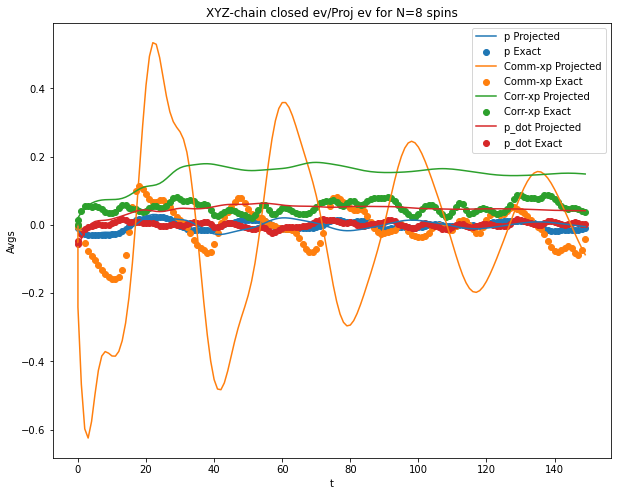

In [9]:
plot_labels = ["p ", "Comm-xp ", "Corr-xp ", "p_dot "]

plt.figure(figsize=(10, 8))
for n in range(4):
    plt.plot(resultsA["ts"], resultsA["averages"][:,n+1], label=plot_labels[n] + "Projected")
    plt.scatter(resultsB["ts"], resultsB["averages"][:,n+1], label=plot_labels[n] + "Exact")
    
plt.xlabel("t")
plt.ylabel("Avgs")
plt.title(title)
plt.legend()

two-body operator chosen
Closed evolution chosen
sampling: 30
--- 19.045551300048828 seconds ---
two-body operator chosen
Closed evolution chosen
sampling: 30
--- 26.991093158721924 seconds ---


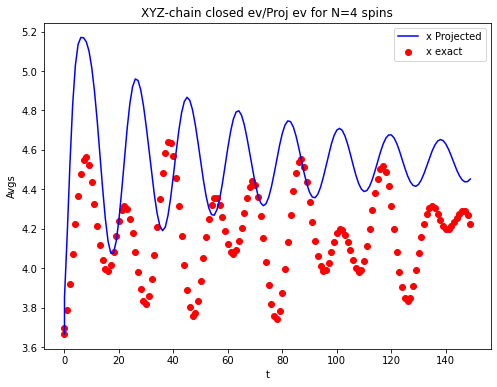

In [6]:
start_time = time.time()
chain_type = "XYZ" 
H_paras = [.15, .25, .1, 1.]
unitary_ev = True; gamma = None
size = 4; gaussian = False; gr = 2; xng = .7

resultsA, title = me.spin_chain_ev(size = size, chain_type = chain_type, Hamiltonian_paras = H_paras, 
                                omega_1=3., omega_2=3., temp=1, tmax = 150, deltat = 1,  a                                two_body_basis = True, unitary_ev = unitary_ev, gamma = gamma,
                                gaussian = gaussian, gr = gr, xng = xng, do_project = True)

print("--- %s seconds ---" % (time.time() - start_time))

resultsB, title = me.spin_chain_ev(size = size, chain_type = chain_type, Hamiltonian_paras = H_paras, 
                                omega_1=3., omega_2=3., temp=1, tmax = 150, deltat = 1,  
                                two_body_basis = True, unitary_ev = unitary_ev, gamma = gamma,
                                gaussian = gaussian, gr = gr, xng = xng, do_project = False)

print("--- %s seconds ---" % (time.time() - start_time))

plt.figure(figsize=(8, 6))
plt.plot(resultsA["ts"], resultsA["averages"][:,0], label="x Projected", color = "blue")
plt.scatter(resultsB["ts"], resultsB["averages"][:,0], label="x exact", color = "red")

plt.xlabel("t")
plt.ylabel("Avgs")

plt.title(title)
plt.legend()

Two-body Gaussian initial state chosen
two-body operator chosen
Closed evolution chosen
sampling: 300
--- 28.205095291137695 seconds ---
Two-body Gaussian initial state chosen
two-body operator chosen
Closed evolution chosen
sampling: 300
--- 54.86956071853638 seconds ---


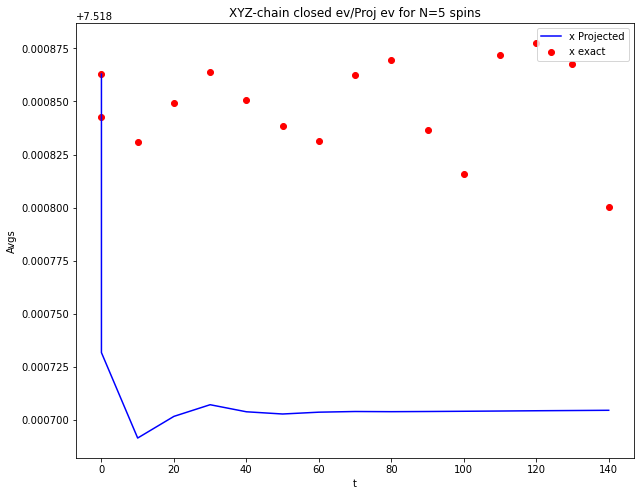

In [2]:
start_time = time.time()
H_paras = [.15, .25, .1, 1.]
size = 5

resultsA, title = me.spin_chain_ev(size = size, chain_type = "XYZ", Hamiltonian_paras = H_paras, 
                                omega_1=3., omega_2=3., temp=1, tmax = 150, deltat = 10,  
                                two_body_basis = True, unitary_ev = True, gamma = 3*np.pi*-1,
                                gaussian = True, gr = 2, xng = .7, do_project = True)

print("--- %s seconds ---" % (time.time() - start_time))

resultsB, title = me.spin_chain_ev(size = size, chain_type = "XYZ", Hamiltonian_paras = H_paras, 
                                omega_1=3., omega_2=3., temp=1, tmax = 150, deltat = 10,  
                                two_body_basis = True, unitary_ev = True, gamma = 3*np.pi*-1,
                                gaussian = True, gr = 2, xng = .7, do_project = False)

print("--- %s seconds ---" % (time.time() - start_time))

plt.figure(figsize=(10, 8))
plt.plot(resultsA["ts"], resultsA["averages"][:,0], label="x Projected", color = "blue")
plt.scatter(resultsB["ts"], resultsB["averages"][:,0], label="x exact", color = "red")

plt.xlabel("t")
plt.ylabel("Avgs")

plt.title(title)
plt.legend()